### GI data

In [21]:
import os # this allows simple navigation of folders in the notebook
import pandas as pd # this loads Pandas
import numpy as np # This loads NumPy, used to do maths in the notebook
from ebmdatalab import bq # this loads the bennett institute bigquery function
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Define function

def bnf_code_filter(df, bnf_code, part_code, excluded_part_code=None):
    # Filter by included prefixes
    included_bnf_codes = df[bnf_code].str.startswith(tuple(part_code))
    
    # If there are excluded prefixes, filter those out
    if excluded_part_code:
        excluded_bnf_code = ~df[bnf_code].str.startswith(tuple(excluded_part_code))
    else:
        excluded_bnf_code = True  # No exclusion, so all are included

    # Apply both filters
    filtered_df = df[included_bnf_codes & excluded_bnf_code]
    
    return filtered_df


#### Load datasets

- gi_df: prescribing data, for 0101 and 0103 of the BNF, from 2019-01 to 2024-05
- bnf_df: hierarchical data for legacy bnf codes and names
- practice_df: practice info, including setting code (4=GP practice)
- statistics_df: practice list sizes per month
- ccg_df: CCG/SICBL information

In [13]:
# Load prescribing data from compressed csv chunks
file_pattern = os.path.join("..","data","omep_df_chunk_*.csv.gz")
file_names = glob.glob(file_pattern) # List all files matching the pattern
gi_df = pd.concat([pd.read_csv(file, compression='gzip') for file in file_names], ignore_index=True) # Load each compressed CSV file into a DataFrame and concatenate them
bnf_df = pd.read_csv(os.path.join("..","data","bnf_df.csv"))
practices_df = pd.read_csv(os.path.join("..","data","practices_df.csv"))
statistics_df = pd.read_csv(os.path.join("..","data","statistics_df.csv"))
ccg_df = pd.read_csv(os.path.join("..","data","ccg_df.csv"))

In [14]:
# Shows first five rows of gi_df.csv
gi_df.head()

,month,pct,practice,bnf_name,bnf_code,items,quantity,net_cost,actual_cost
0,2023-04-01,36L,H83611,Omeprazole 40mg gastro-resistant capsules,0103050P0AAAEAE,8,280.0,27.20,25.70305
1,2023-04-01,B2M3M,M86001,Omeprazole 40mg gastro-resistant capsules,0103050P0AAAEAE,8,252.0,24.48,23.14266
2,2023-04-01,W2U3Z,E85696,Omeprazole 40mg gastro-resistant capsules,0103050P0AAAEAE,9,140.0,13.60,12.91352
3,2023-04-01,99F,F81061,Omeprazole 40mg gastro-resistant capsules,0103050P0AAAEAE,9,258.0,25.06,23.80102
4,2023-04-01,15E,M85164,Omeprazole 40mg gastro-resistant capsules,0103050P0AAAEAE,9,364.0,35.36,33.39660


In [15]:
# Shows first five rows of bnf_df.csv
bnf_df.head()

,chapter,chapter_code,section,section_code,para,para_code,subpara,subpara_code,chemical,chemical_code,product,product_code,presentation,presentation_code
0,Gastro-Intestinal System,1,Dyspepsia and gastro-oesophageal reflux disease,101,Antacids and simeticone,10101,Antacids and simeticone,101010,Other antacid and simeticone preparations,010101000,Proprietary compound preparation BNF 0101010,010101000BB,Indigestion mixture,010101000BBAJA0
1,Gastro-Intestinal System,1,Dyspepsia and gastro-oesophageal reflux disease,101,Antacids and simeticone,10101,Antacids and simeticone,101010,Alexitol sodium,0101010A0,Alexitol sodium,0101010A0AA,Alexitol sodium 360mg tablets,0101010A0AAAAAA
2,Gastro-Intestinal System,1,Dyspepsia and gastro-oesophageal reflux disease,101,Antacids and simeticone,10101,Antacids and simeticone,101010,Alexitol sodium,0101010A0,Actal,0101010A0BB,Actal 360mg tablets,0101010A0BBAAAA
3,Gastro-Intestinal System,1,Dyspepsia and gastro-oesophageal reflux disease,101,Antacids and simeticone,10101,Antacids and simeticone,101010,Aluminium hydroxide,0101010C0,Aluminium hydroxide,0101010C0AA,Aluminium hydroxide 475mg capsules,0101010C0AAAAAA
4,Gastro-Intestinal System,1,Dyspepsia and gastro-oesophageal reflux disease,101,Antacids and simeticone,10101,Antacids and simeticone,101010,Aluminium hydroxide,0101010C0,Aluminium hydroxide,0101010C0AA,Aluminium hydroxide oral suspension sugar free,0101010C0AAACAC


In [19]:
# Defines ranitidine codes, refer to codelists made previously. 
# Higher level codes (e.g. for ranitidine overall) are shorter, codes of more specific formulations are shorter.
ranitidine_code = ['0103010T0']
ranitidine_exclude_codes = ['0103010T0AAADAD', '0103010T0BBADAD']

In [17]:
# Enters ranitidine variables into the bnf_code_filter function defined at the start.
# Creates a version of gi_df filtered for ranitidine.
data_filtered_ranitidine = bnf_code_filter(gi_df, 'bnf_code', ranitidine_code, ranitidine_exclude_codes)
print(data_filtered_ranitidine)

               month    pct practice  \
666171    2019-02-01    05G   M83089   
666172    2019-02-01    27D   N81087   
666173    2019-02-01    91Q   G82057   
666174    2019-02-01    00V   P83011   
666175    2019-02-01    01J   N83043   
...              ...    ...      ...   
12909531  2019-03-01    15E   Y03835   
12909532  2019-03-01    15E   M85730   
12909533  2019-03-01    99E   F81186   
12909534  2019-03-01    36L   H85022   
12909535  2019-03-01  A3A8R   F84686   

                                              bnf_name         bnf_code  \
666171    Ranitidine 75mg/5ml oral solution sugar free  0103010T0AAAEAE   
666172    Ranitidine 75mg/5ml oral solution sugar free  0103010T0AAAEAE   
666173    Ranitidine 75mg/5ml oral solution sugar free  0103010T0AAAEAE   
666174    Ranitidine 75mg/5ml oral solution sugar free  0103010T0AAAEAE   
666175    Ranitidine 75mg/5ml oral solution sugar free  0103010T0AAAEAE   
...                                                ...              .

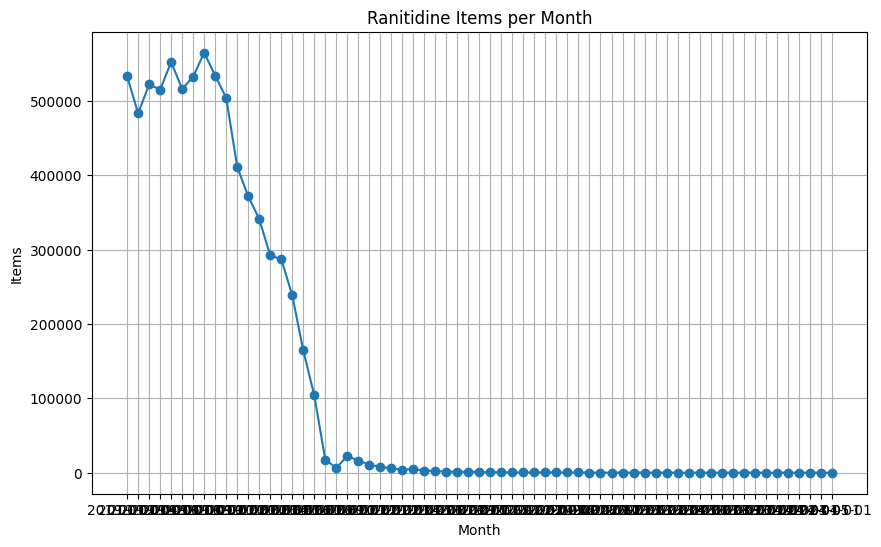

In [24]:
ranitidine_monthly_totals = data_filtered_ranitidine.groupby('month')['items'].sum().reset_index()

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(ranitidine_monthly_totals['month'], ranitidine_monthly_totals['items'], marker='o')

# Add titles and labels
plt.title('Ranitidine Items per Month')
plt.xlabel('Month')
plt.ylabel('Items')

# Show the plot
plt.grid(True)
plt.show()

In [23]:
alternative_H2RA = ['0103010H0', '0103010N0', '0103010D0']

In [25]:
data_filtered_alternative_H2RA = bnf_code_filter(gi_df, 'bnf_code', alternative_H2RA)

print(data_filtered_alternative_H2RA)

               month    pct practice                   bnf_name  \
666400    2020-07-01  A3A8R   F86045   Cimetidine 200mg tablets   
666408    2020-07-01    05D   M83013   Cimetidine 200mg tablets   
666410    2020-07-01    06Q   F81122   Cimetidine 200mg tablets   
666411    2020-07-01    15N   L83131   Cimetidine 200mg tablets   
666414    2020-07-01    91Q   G82790   Cimetidine 200mg tablets   
...              ...    ...      ...                        ...   
12927894  2019-03-01    04V   C82102  Nizatidine 300mg capsules   
12927895  2019-03-01    11J   J81051  Nizatidine 300mg capsules   
12927896  2019-03-01    14L   P84068  Nizatidine 300mg capsules   
12927897  2019-03-01    15N   L83096  Nizatidine 300mg capsules   
12927898  2019-03-01    15N   L83002  Nizatidine 300mg capsules   

                 bnf_code  items  quantity  net_cost  actual_cost  
666400    0103010D0AAAAAA      8     210.0     64.92     61.20313  
666408    0103010D0AAAAAA     10     596.0    184.18    171

In [26]:
H2RA_monthly_totals = data_filtered_alternative_H2RA.groupby('month')['items'].sum().reset_index()

print(H2RA_monthly_totals)

         month   items
0   2019-01-01    4640
1   2019-02-01    4171
2   2019-03-01    4475
3   2019-04-01    4382
4   2019-05-01    4646
..         ...     ...
60  2024-01-01  257052
61  2024-02-01  247258
62  2024-03-01  255719
63  2024-04-01  269714
64  2024-05-01  282042

[65 rows x 2 columns]


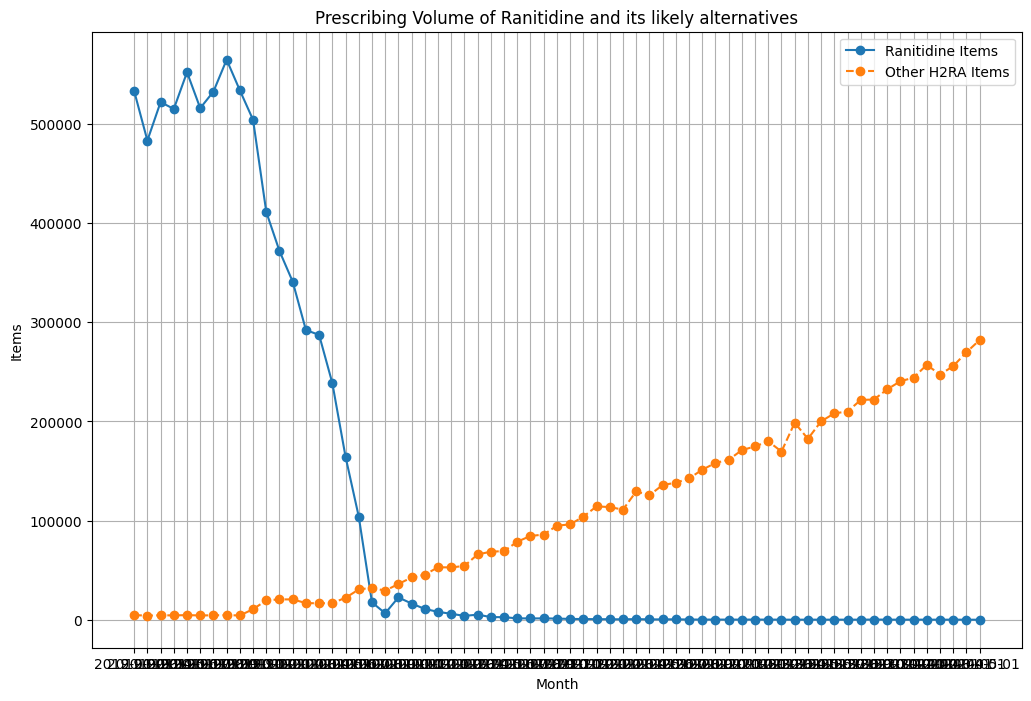

In [27]:
# Plot the original monthly totals for Ranitidine
plt.figure(figsize=(12, 8))
plt.plot(ranitidine_monthly_totals['month'], ranitidine_monthly_totals['items'], marker='o', label='Ranitidine Items')

# Plot the aggregated totals for the Alternative H2RA chemicals
plt.plot(H2RA_monthly_totals['month'], H2RA_monthly_totals['items'], marker='o', linestyle='--', label='Other H2RA Items')

# Add titles and labels
plt.title('Prescribing Volume of Ranitidine and its likely alternatives')
plt.xlabel('Month')
plt.ylabel('Items')

# Adding a legend to differentiate the lines
plt.legend()

# Adding grid for better readability
plt.grid(True)

# Display the plot
plt.show()

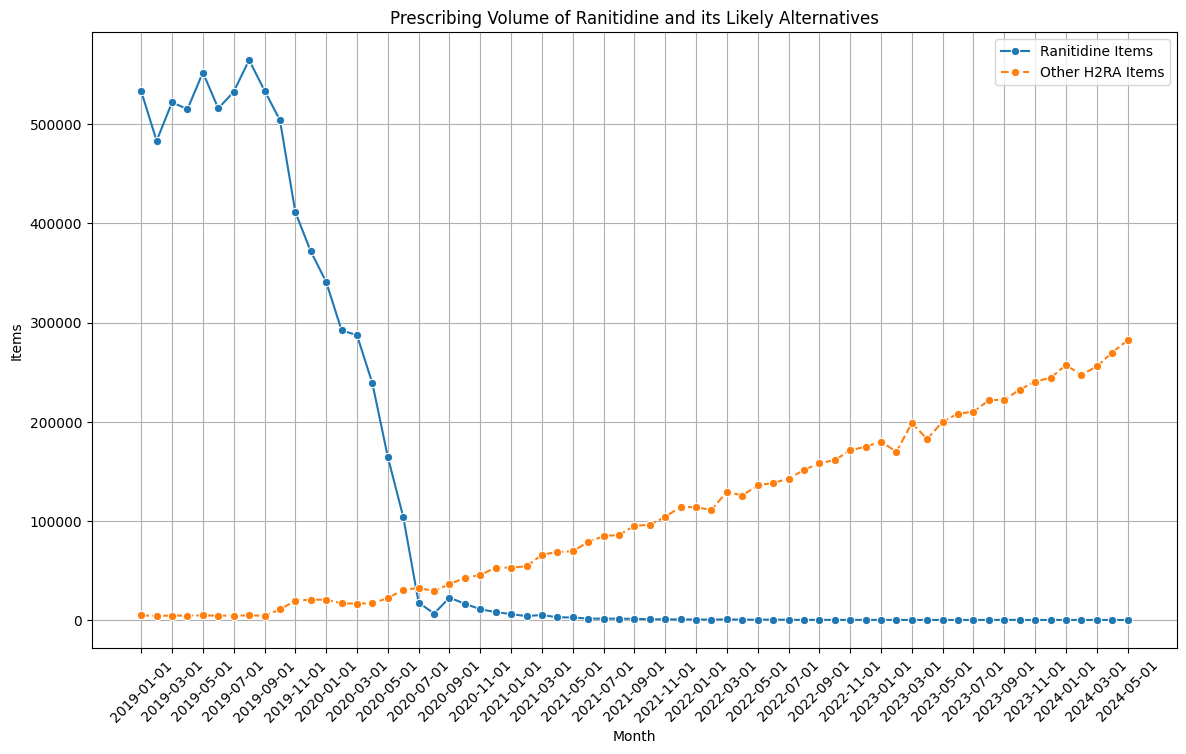

In [28]:
# Create a Seaborn figure
plt.figure(figsize=(14, 8))  # Increase figure size for better readability

# Plot the original monthly totals for Ranitidine using Seaborn
sns.lineplot(data=ranitidine_monthly_totals, x='month', y='items', marker='o', label='Ranitidine Items')

# Plot the aggregated totals for the Alternative H2RA chemicals
sns.lineplot(data=H2RA_monthly_totals, x='month', y='items', marker='o', linestyle='--', label='Other H2RA Items')

# Rotate x-axis labels to avoid overlapping
plt.xticks(rotation=45)

# Optionally reduce the number of ticks on the x-axis
plt.xticks(ticks=ranitidine_monthly_totals['month'][::2], rotation=45)

# Add titles and labels
plt.title('Prescribing Volume of Ranitidine and its Likely Alternatives')
plt.xlabel('Month')
plt.ylabel('Items')

# Add a legend to differentiate the lines
plt.legend()

# Adding grid for better readability
plt.grid(True)

# Display the plot
plt.show()

In [29]:
PPIs_codes = ['0103050E0','0103050L0','0103050P0','0103050R0','0103050T0']
PPIs_exclude_codes = ['0103050E0AAACAC','0103050E0BBACAC','0103050P0BBAHBG',
                      '0103050P0BBAGAV','0103050P0AABGBG','0103050P0AAAVAV',
                      '0103050R0AAACAC','0103050R0BBACAC']

In [30]:
data_filtered_PPIs = bnf_code_filter(gi_df, 'bnf_code', PPIs_codes, PPIs_exclude_codes)

print(data_filtered_PPIs)

               month    pct practice  \
0         2023-04-01    36L   H83611   
1         2023-04-01  B2M3M   M86001   
2         2023-04-01  W2U3Z   E85696   
3         2023-04-01    99F   F81061   
4         2023-04-01    15E   M85164   
...              ...    ...      ...   
13253511  2023-11-01    00Y   Y02827   
13253512  2023-11-01    15E   M85048   
13253513  2023-08-01    00N   A88002   
13253514  2023-08-01    15F   B86104   
13253515  2023-08-01    07K   D83075   

                                           bnf_name         bnf_code  items  \
0         Omeprazole 40mg gastro-resistant capsules  0103050P0AAAEAE      8   
1         Omeprazole 40mg gastro-resistant capsules  0103050P0AAAEAE      8   
2         Omeprazole 40mg gastro-resistant capsules  0103050P0AAAEAE      9   
3         Omeprazole 40mg gastro-resistant capsules  0103050P0AAAEAE      9   
4         Omeprazole 40mg gastro-resistant capsules  0103050P0AAAEAE      9   
...                                          

In [31]:
PPIs_monthly_totals = data_filtered_PPIs.groupby('month')['items'].sum().reset_index()

print(PPIs_monthly_totals)

         month    items
0   2019-01-01  5209246
1   2019-02-01  4705857
2   2019-03-01  5078594
3   2019-04-01  5008732
4   2019-05-01  5354303
..         ...      ...
60  2024-01-01  6503445
61  2024-02-01  6100512
62  2024-03-01  6205119
63  2024-04-01  6430734
64  2024-05-01  6569924

[65 rows x 2 columns]


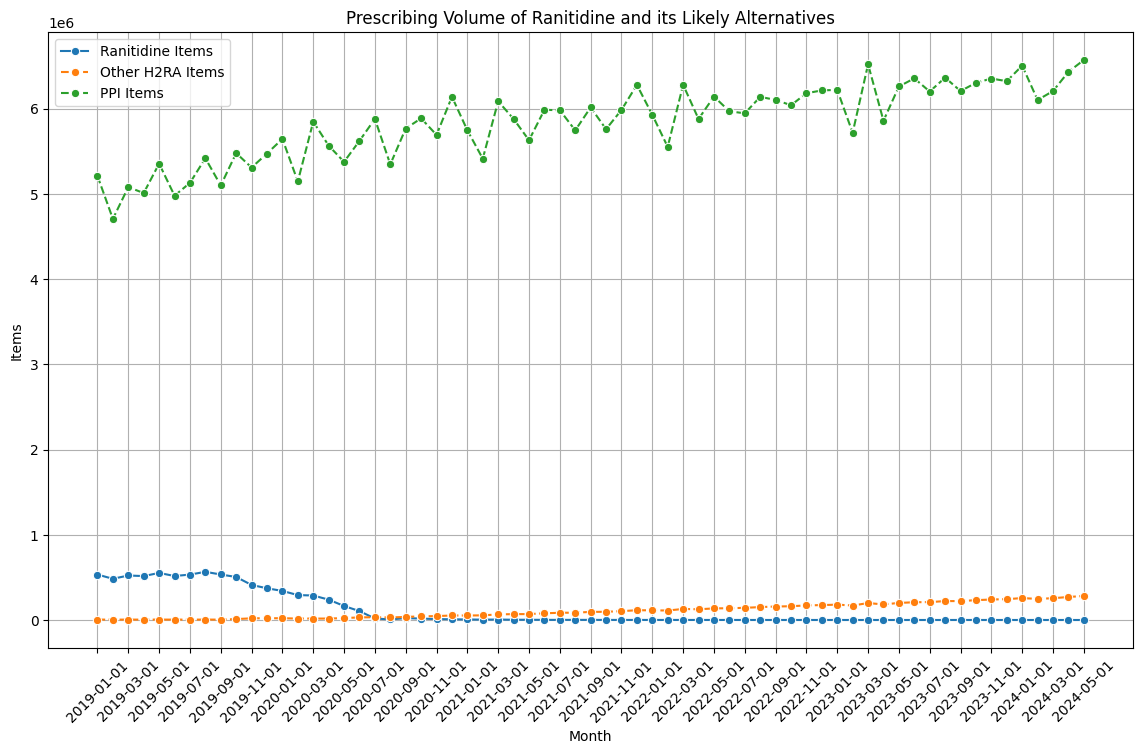

In [33]:
# Create a Seaborn figure
plt.figure(figsize=(14, 8))  # Increase figure size for better readability

# Plot the original monthly totals for Ranitidine using Seaborn
sns.lineplot(data=ranitidine_monthly_totals, x='month', y='items', marker='o', label='Ranitidine Items')

# Plot the aggregated totals for the Alternative H2RA chemicals
sns.lineplot(data=H2RA_monthly_totals, x='month', y='items', marker='o', linestyle='--', label='Other H2RA Items')

# Plot the aggregated totals for PPIs
sns.lineplot(data=PPIs_monthly_totals, x='month', y='items', marker='o', linestyle='--', label='PPI Items')

# Rotate x-axis labels to avoid overlapping
plt.xticks(rotation=45)

# Optionally reduce the number of ticks on the x-axis
plt.xticks(ticks=ranitidine_monthly_totals['month'][::2], rotation=45)

# Add titles and labels
plt.title('Prescribing Volume of Ranitidine and its Likely Alternatives')
plt.xlabel('Month')
plt.ylabel('Items')

# Add a legend to differentiate the lines
plt.legend()

# Adding grid for better readability
plt.grid(True)

# Display the plot
plt.show()

In [34]:
antacids_codes = ['010101','0101021C0AA','010102100BBAXA0','0101021C0BNAAAF',
                  '0101021C0BJABAF','0101021C0BJAAAF','0101021C0BBAAAF']
antacids_exclude_codes = ['0101010F0AAAVAV','0101010F0AAAWAW','0101010F0AABABA',
                          '0101010F0AAAXAX','0101010F0AAAZAZ','0101010F0AAAYAY',
                          '0101010F0AABDBD','0101010F0AABBBB','0101010F0AABCBC',
                          '0101010J0AAAIAI','0101010J0AAAKAK','0101010J0AAAJAJ',
                          '010101000BB','010101000BBAJA0','010101200AA',
                          '010101200AAACAC','010101200AAABAB']

In [35]:
data_filtered_antacids = bnf_code_filter(gi_df, 'bnf_code', antacids_codes, antacids_exclude_codes)

print(data_filtered_antacids)

               month    pct practice  \
666148    2022-02-01  W2U3Z   E87024   
666155    2022-02-01  A3A8R   F84050   
666164    2022-05-01    93C   F85019   
666165    2022-05-01  M1J4Y   E81032   
666167    2022-05-01    13T   A85019   
...              ...    ...      ...   
12722226  2019-03-01    15N   L83666   
12722228  2019-03-01  W2U3Z   Y00902   
12722230  2019-03-01    72Q   G83052   
12722236  2019-03-01    52R   C84017   
12722238  2019-03-01    02G   P81710   

                                                   bnf_name         bnf_code  \
666148                              Mucogel oral suspension  0101010G0BCABAB   
666155                              Mucogel oral suspension  0101010G0BCABAB   
666164                              Mucogel oral suspension  0101010G0BCABAB   
666165           SodiBic 420mg/5ml (1mmol/ml) oral solution  0101012B0BCAAAB   
666167    Co-magaldrox 195mg/220mg/5ml oral suspension s...  0101010G0AAABAB   
...                                    

In [36]:
antacids_monthly_totals = data_filtered_antacids.groupby('month')['items'].sum().reset_index()

print(antacids_monthly_totals)

         month  items
0   2019-01-01  12180
1   2019-02-01  10890
2   2019-03-01  11623
3   2019-04-01  11094
4   2019-05-01  11618
..         ...    ...
60  2024-01-01   7423
61  2024-02-01   6768
62  2024-03-01   6387
63  2024-04-01   6723
64  2024-05-01   6312

[65 rows x 2 columns]


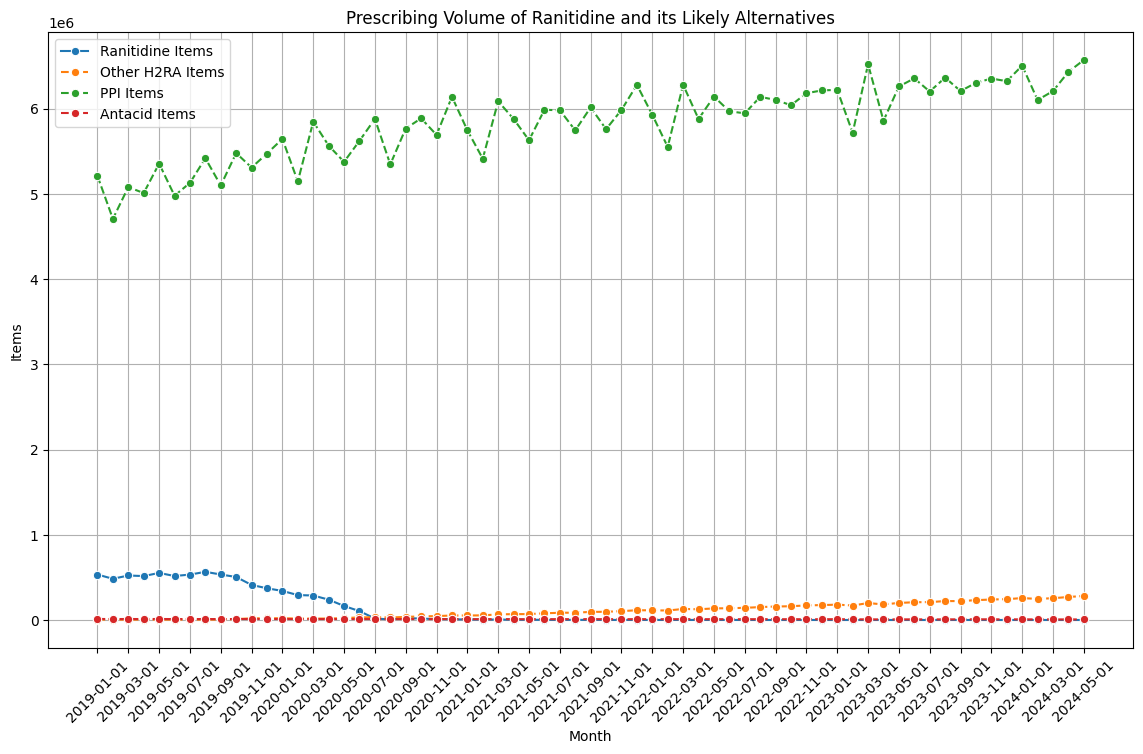

In [37]:
# Create a Seaborn figure 
plt.figure(figsize=(14, 8))  # Increase figure size for better readability

# Plot the original monthly totals for Ranitidine using Seaborn
sns.lineplot(data=ranitidine_monthly_totals, x='month', y='items', marker='o', label='Ranitidine Items')

# Plot the aggregated totals for the Alternative H2RA chemicals
sns.lineplot(data=H2RA_monthly_totals, x='month', y='items', marker='o', linestyle='--', label='Other H2RA Items')

# Plot the aggregated totals for PPIs
sns.lineplot(data=PPIs_monthly_totals, x='month', y='items', marker='o', linestyle='--', label='PPI Items')

# Plot the aggregated totals for antacids
sns.lineplot(data=antacids_monthly_totals, x='month', y='items', marker='o', linestyle='--', label='Antacid Items')

# Rotate x-axis labels to avoid overlapping
plt.xticks(rotation=45)

# Optionally reduce the number of ticks on the x-axis
plt.xticks(ticks=ranitidine_monthly_totals['month'][::2], rotation=45)

# Add titles and labels
plt.title('Prescribing Volume of Ranitidine and its Likely Alternatives')
plt.xlabel('Month')
plt.ylabel('Items')

# Add a legend to differentiate the lines
plt.legend()

# Adding grid for better readability
plt.grid(True)

# Display the plot
plt.show()

In [40]:
ranitidine_monthly_spend = data_filtered_ranitidine.groupby('month')['actual_cost'].sum().reset_index()

print(ranitidine_monthly_spend)

         month   actual_cost
0   2019-01-01  743623.97425
1   2019-02-01  673441.11769
2   2019-03-01  730181.58266
3   2019-04-01  730210.06318
4   2019-05-01  787721.29312
..         ...           ...
60  2024-01-01     514.37915
61  2024-02-01     187.99284
62  2024-03-01     393.79345
63  2024-04-01     120.30642
64  2024-05-01      20.96213

[65 rows x 2 columns]


In [41]:
H2RA_monthly_spend = data_filtered_alternative_H2RA.groupby('month')['actual_cost'].sum().reset_index()

print(H2RA_monthly_spend)

         month   actual_cost
0   2019-01-01  9.147215e+04
1   2019-02-01  8.383347e+04
2   2019-03-01  8.937034e+04
3   2019-04-01  8.702313e+04
4   2019-05-01  9.266153e+04
..         ...           ...
60  2024-01-01  6.204204e+06
61  2024-02-01  5.864717e+06
62  2024-03-01  6.043763e+06
63  2024-04-01  5.955883e+06
64  2024-05-01  6.258206e+06

[65 rows x 2 columns]


In [42]:
PPIs_monthly_spend = data_filtered_PPIs.groupby('month')['actual_cost'].sum().reset_index()

print(PPIs_monthly_spend)

         month   actual_cost
0   2019-01-01  7.181512e+06
1   2019-02-01  6.467244e+06
2   2019-03-01  7.010140e+06
3   2019-04-01  7.472730e+06
4   2019-05-01  8.448547e+06
..         ...           ...
60  2024-01-01  1.695339e+07
61  2024-02-01  1.579415e+07
62  2024-03-01  1.623434e+07
63  2024-04-01  1.301335e+07
64  2024-05-01  1.320627e+07

[65 rows x 2 columns]


In [43]:
antacids_monthly_spend = data_filtered_antacids.groupby('month')['actual_cost'].sum().reset_index()

print(antacids_monthly_spend)

         month   actual_cost
0   2019-01-01  276491.64631
1   2019-02-01  252382.40671
2   2019-03-01  262789.32761
3   2019-04-01  264856.85237
4   2019-05-01  264027.07248
..         ...           ...
60  2024-01-01  235436.01139
61  2024-02-01  198710.49545
62  2024-03-01  203207.92252
63  2024-04-01  231195.51458
64  2024-05-01  229282.03053

[65 rows x 2 columns]


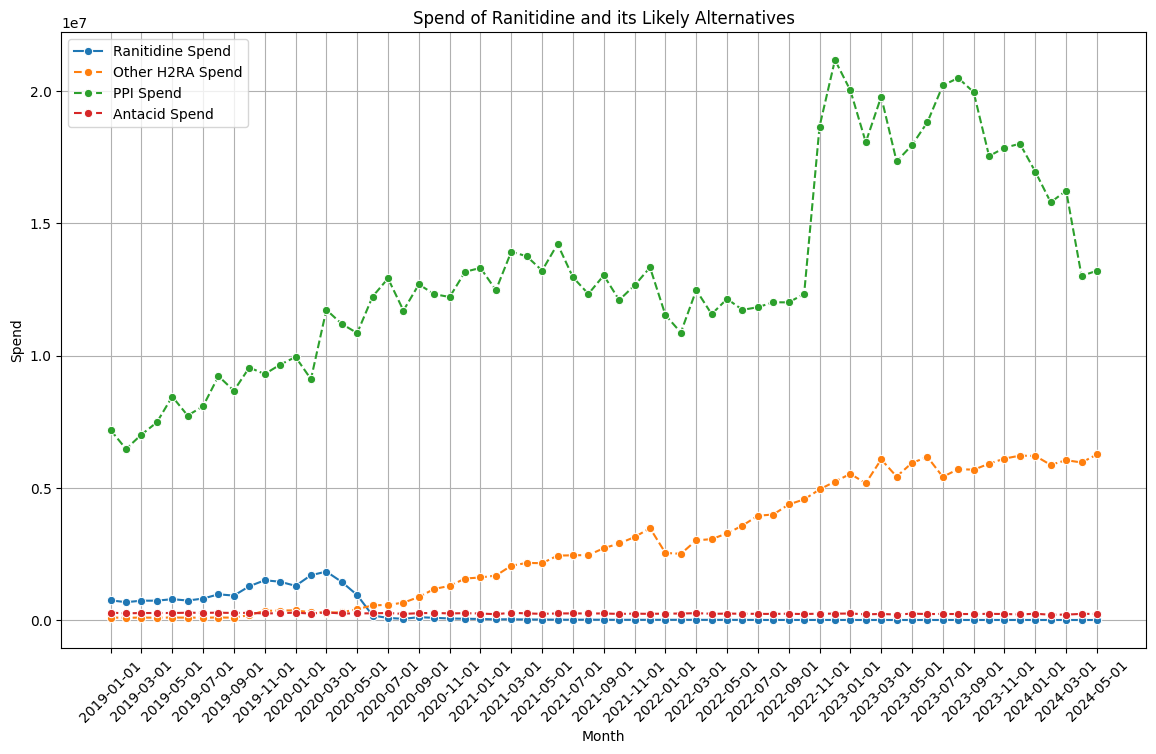

In [46]:
# Create a Seaborn figure 
plt.figure(figsize=(14, 8))  # Increase figure size for better readability

# Plot the original monthly spend for Ranitidine using Seaborn
sns.lineplot(data=ranitidine_monthly_spend, x='month', y='actual_cost', marker='o', label='Ranitidine Spend')

# Plot the aggregated total spend for the Alternative H2RA chemicals
sns.lineplot(data=H2RA_monthly_spend, x='month', y='actual_cost', marker='o', linestyle='--', label='Other H2RA Spend')

# Plot the aggregated total spend for PPIs
sns.lineplot(data=PPIs_monthly_spend, x='month', y='actual_cost', marker='o', linestyle='--', label='PPI Spend')

# Plot the aggregated total spend for antacids
sns.lineplot(data=antacids_monthly_spend, x='month', y='actual_cost', marker='o', linestyle='--', label='Antacid Spend')

# Rotate x-axis labels to avoid overlapping
plt.xticks(rotation=45)

# Optionally reduce the number of ticks on the x-axis
plt.xticks(ticks=ranitidine_monthly_spend['month'][::2], rotation=45)

# Add titles and labels
plt.title('Spend of Ranitidine and its Likely Alternatives')
plt.xlabel('Month')
plt.ylabel('Spend')

# Add a legend to differentiate the lines
plt.legend()

# Adding grid for better readability
plt.grid(True)

# Display the plot
plt.show()

In [47]:
nizatidine_codes = ['0103010N0']
nizatidine_exclude_codes = ['0103010N0BBACAC','0103010N0AAACAC']

data_filtered_nizatidine = bnf_code_filter(gi_df, 'bnf_code', nizatidine_codes, nizatidine_exclude_codes)
print(data_filtered_nizatidine)

               month  pct practice                   bnf_name  \
1194567   2022-02-01  06H   D81030  Nizatidine 150mg capsules   
1194568   2022-02-01  15F   B86017  Nizatidine 150mg capsules   
1194569   2022-02-01  84H   A83021  Nizatidine 150mg capsules   
1194570   2022-02-01  26A   D83034  Nizatidine 150mg capsules   
1194571   2022-02-01  27D   N81082  Nizatidine 150mg capsules   
...              ...  ...      ...                        ...   
12927894  2019-03-01  04V   C82102  Nizatidine 300mg capsules   
12927895  2019-03-01  11J   J81051  Nizatidine 300mg capsules   
12927896  2019-03-01  14L   P84068  Nizatidine 300mg capsules   
12927897  2019-03-01  15N   L83096  Nizatidine 300mg capsules   
12927898  2019-03-01  15N   L83002  Nizatidine 300mg capsules   

                 bnf_code  items  quantity  net_cost  actual_cost  
1194567   0103010N0AAAAAA      6     330.0    129.91    121.68365  
1194568   0103010N0AAAAAA      6     228.0     89.75     84.59829  
1194569   01030

In [48]:
nizatidine_monthly_totals = data_filtered_nizatidine.groupby('month')['items'].sum().reset_index()
print(nizatidine_monthly_totals)

         month  items
0   2019-01-01    842
1   2019-02-01    813
2   2019-03-01    850
3   2019-04-01    861
4   2019-05-01    881
..         ...    ...
60  2024-01-01  11977
61  2024-02-01  11012
62  2024-03-01  11318
63  2024-04-01  11637
64  2024-05-01  11925

[65 rows x 2 columns]


In [49]:
famotidine_codes = ['0103010H0']

data_filtered_famotidine = bnf_code_filter(gi_df, 'bnf_code', famotidine_codes)
print(data_filtered_famotidine)

               month    pct practice                 bnf_name  \
1143427   2022-02-01    03W   C82611  Famotidine 20mg tablets   
1143428   2022-02-01    11J   J81045  Famotidine 20mg tablets   
1143429   2022-02-01    14Y   K82045  Famotidine 20mg tablets   
1143430   2022-02-01    15E   M85136  Famotidine 20mg tablets   
1143431   2022-02-01    15E   M89016  Famotidine 20mg tablets   
...              ...    ...      ...                      ...   
12831075  2019-03-01    91Q   G82160  Famotidine 40mg tablets   
12831076  2019-03-01    15A   K81022  Famotidine 40mg tablets   
12831077  2019-03-01    15F   B86093  Famotidine 40mg tablets   
12831078  2019-03-01    15N   L83069  Famotidine 40mg tablets   
12831079  2019-03-01  X2C4Y   B85008  Famotidine 40mg tablets   

                 bnf_code  items  quantity  net_cost  actual_cost  
1143427   0103010H0AAAAAA      6     284.0    173.66    162.75477  
1143428   0103010H0AAAAAA      6     224.0    132.40    124.02718  
1143429   01030

In [50]:
famotidine_monthly_totals = data_filtered_famotidine.groupby('month')['items'].sum().reset_index()
print(famotidine_monthly_totals)

         month   items
0   2019-01-01     893
1   2019-02-01     782
2   2019-03-01     848
3   2019-04-01     834
4   2019-05-01     852
..         ...     ...
60  2024-01-01  238319
61  2024-02-01  229961
62  2024-03-01  238043
63  2024-04-01  251506
64  2024-05-01  263301

[65 rows x 2 columns]


In [51]:
cimetidine_codes = ['0103010D0']
cimetidine_exclude_codes = ['0103010D0AAAEAE','0103010D0BBAEAE']

data_filtered_cimetidine = bnf_code_filter(gi_df, 'bnf_code', cimetidine_codes, cimetidine_exclude_codes)
print(data_filtered_cimetidine)

               month    pct practice                  bnf_name  \
666400    2020-07-01  A3A8R   F86045  Cimetidine 200mg tablets   
666408    2020-07-01    05D   M83013  Cimetidine 200mg tablets   
666410    2020-07-01    06Q   F81122  Cimetidine 200mg tablets   
666411    2020-07-01    15N   L83131  Cimetidine 200mg tablets   
666414    2020-07-01    91Q   G82790  Cimetidine 200mg tablets   
...              ...    ...      ...                       ...   
12844913  2019-03-01    15F   B86077  Cimetidine 400mg tablets   
12844914  2019-03-01    15N   L83073  Cimetidine 400mg tablets   
12844915  2019-03-01    26A   D82038  Cimetidine 400mg tablets   
12844916  2019-03-01  W2U3Z   E84005  Cimetidine 400mg tablets   
12844917  2019-03-01    15N   L83078  Cimetidine 400mg tablets   

                 bnf_code  items  quantity  net_cost  actual_cost  
666400    0103010D0AAAAAA      8     210.0     64.92     61.20313  
666408    0103010D0AAAAAA     10     596.0    184.18    171.08406  
666

In [52]:
cimetidine_monthly_totals = data_filtered_cimetidine.groupby('month')['items'].sum().reset_index()
print(cimetidine_monthly_totals)

         month  items
0   2019-01-01   2905
1   2019-02-01   2576
2   2019-03-01   2777
3   2019-04-01   2687
4   2019-05-01   2913
..         ...    ...
60  2024-01-01   6756
61  2024-02-01   6285
62  2024-03-01   6358
63  2024-04-01   6571
64  2024-05-01   6816

[65 rows x 2 columns]


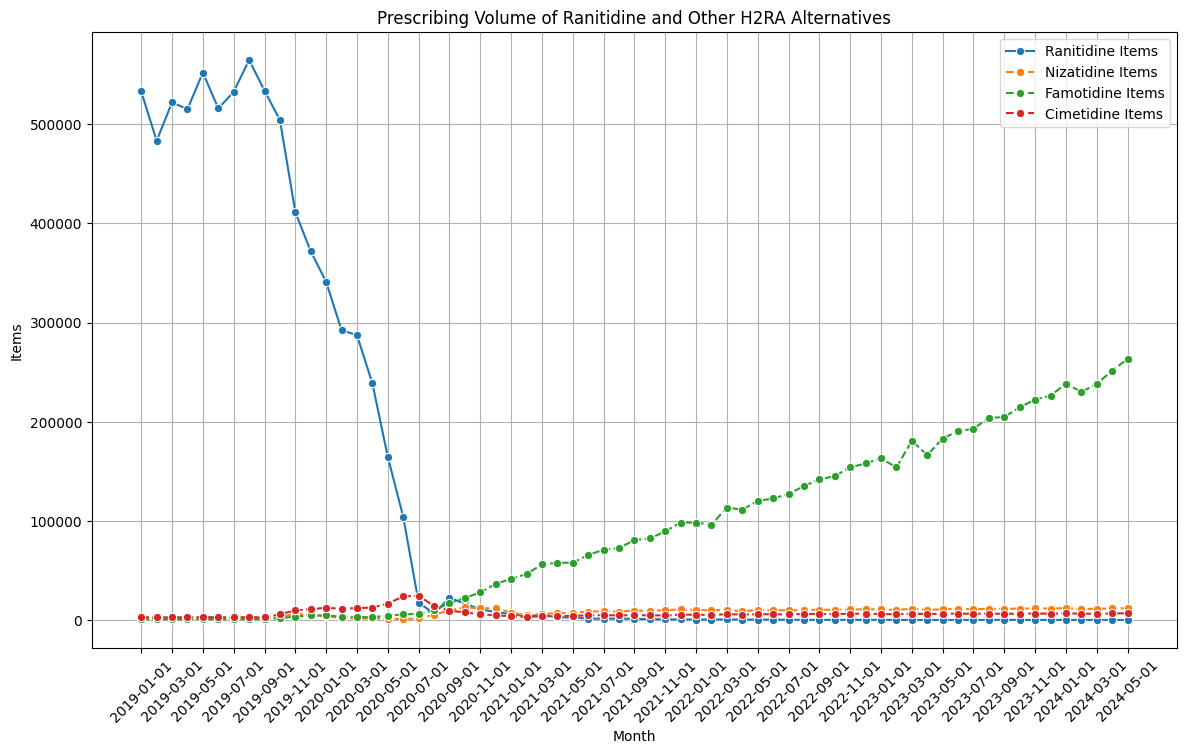

In [53]:
# Create a Seaborn figure 
plt.figure(figsize=(14, 8))  # Increase figure size for better readability

# Plot the original monthly totals for Ranitidine using Seaborn
sns.lineplot(data=ranitidine_monthly_totals, x='month', y='items', marker='o', label='Ranitidine Items')

# Plot the totals for the Nizatidine
sns.lineplot(data=nizatidine_monthly_totals, x='month', y='items', marker='o', linestyle='--', label='Nizatidine Items')

# Plot the totals for Famotidine
sns.lineplot(data=famotidine_monthly_totals, x='month', y='items', marker='o', linestyle='--', label='Famotidine Items')

# Plot the totals for Cimetidine
sns.lineplot(data=cimetidine_monthly_totals, x='month', y='items', marker='o', linestyle='--', label='Cimetidine Items')

# Rotate x-axis labels to avoid overlapping
plt.xticks(rotation=45)

# Optionally reduce the number of ticks on the x-axis
plt.xticks(ticks=ranitidine_monthly_totals['month'][::2], rotation=45)

# Add titles and labels
plt.title('Prescribing Volume of Ranitidine and Other H2RA Alternatives')
plt.xlabel('Month')
plt.ylabel('Items')

# Add a legend to differentiate the lines
plt.legend()

# Adding grid for better readability
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
omeprazole_codes = ['0103010N0']
omeprazole_exclude_codes = ['0103010N0BBACAC','0103010N0AAACAC']

data_filtered_omeprazole = bnf_code_filter(gi_df, 'bnf_code', omeprazole_codes, omeprazole_exclude_codes)
print(data_filtered_omeprazole)